# TensorFlow and Keras

In [ ]:
#Uncomment and use it
#!pip install tensorflow

In [1]:
import tensorflow as tf
%matplotlib inline  

## Tensors

#### Constants

tf.constant creates constant values, these values do not change
or update during optimization process(training phase)

In [2]:
a = tf.constant([50,10])
print(a)

tf.Tensor([50 10], shape=(2,), dtype=int32)


Few things that we can do with the tensors at the runtime:
1. Directly get a numpy value of the tensor
2. dtype : data type of the tensor(int16/int32/float32/float64)
3. shape: shape of the tensor

In [3]:
print('a in tensorflow ==>', a)
print('numpy value of a ==>', a.numpy())
print('dtype of a ==>', a.dtype)
print('shape of a ==>', a.shape)

a in tensorflow ==> tf.Tensor([50 10], shape=(2,), dtype=int32)
numpy value of a ==> [50 10]
dtype of a ==> <dtype: 'int32'>
shape of a ==> (2,)


We can use inbuild tf.XX() function to create constant tensors, just like numpy.

In [5]:
print('Tensor of Ones: \n',tf.ones(shape=(2, 2)))
print('Tensor of Zeros: \n',tf.zeros(shape=(2, 2)))
print('Random normal values \n', tf.random.normal(shape=(3, 2),
                                                  mean=5, 
                                                  stddev=1))

Tensor of Ones: 
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
Tensor of Zeros: 
 tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
Random normal values 
 tf.Tensor(
[[5.673042  4.7917175]
 [4.9203796 5.9927754]
 [4.7518125 7.4201283]], shape=(3, 2), dtype=float32)


### Variables

We generally create a variable with some values, call it initialized values, 
convert this constant tensor into a variable and then mutate the variable by using special functions.

In [6]:
x = tf.Variable(5) # Simple variable
print(x)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>


In [7]:
#randomly initialized variable, like we need for our weights
w = tf.Variable(tf.random.normal(shape=(2, 2))) 
print(w)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.2085123 ,  1.5753042 ],
       [-0.97220194,  1.2969507 ]], dtype=float32)>


In [11]:
m = tf.Variable(5) # Simple variable
print(m)

m = tf.Variable(5) 
print('New value', m.assign(2))

m = tf.Variable(5) 
print('increment by 1', m.assign_add(1))
print(m.numpy())

m = tf.Variable(5) 
print('Decrement by 2', m.assign_sub(2))
print(m.numpy())


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>
New value <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=2>
increment by 1 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=6>
6
Decrement by 2 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=3>
3


### Regression Model building in TensorFlow

#This step is for data creation, x and y

In [22]:
import numpy as np
a = np.random.normal(500, 10)
a

483.083518431049

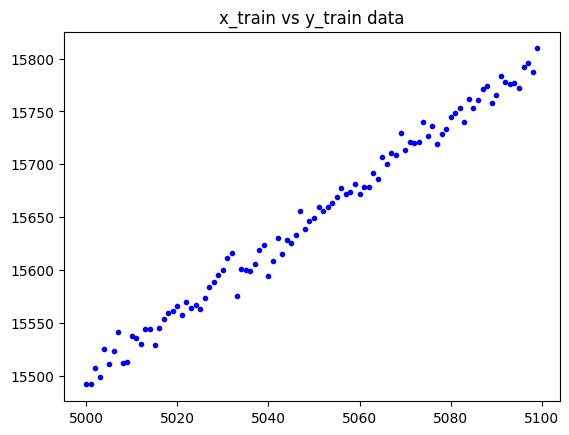

In [28]:
#This step is for data creation, x and y
import numpy as np
x_train= np.array(range(5000,5100)).reshape(-1,1)


y_train=[3*i+np.random.normal(500, 10) for i in x_train]

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.')
plt.show()

In [33]:
#Model y=X*W + b
#Model function
def output(x):
    return W*x + b

#Loss function Reduce mean square
def loss_function(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 500 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}, dW : {dloss_dw.numpy()}, db : {dloss_db.numpy()}")

epoch : 0, loss  156601952.0,  W : [[0.7470696]], b  [1.000025], dW : [[-1.2638163e+08]], db : [-25027.744]
epoch : 1, loss  141036928.0,  W : [[0.8670062]], b  [1.0000488], dW : [[-1.199366e+08]], db : [-23751.416]
epoch : 2, loss  127018912.0,  W : [[0.98082644]], b  [1.0000713], dW : [[-1.1382024e+08]], db : [-22540.176]
epoch : 3, loss  114394208.0,  W : [[1.0888423]], b  [1.0000926], dW : [[-1.0801581e+08]], db : [-21390.705]
epoch : 4, loss  103024272.0,  W : [[1.1913496]], b  [1.0001129], dW : [[-1.0250737e+08]], db : [-20299.855]
epoch : 5, loss  92784456.0,  W : [[1.2886294]], b  [1.0001322], dW : [[-97279840.]], db : [-19264.633]
epoch : 6, loss  83562392.0,  W : [[1.3809483]], b  [1.0001504], dW : [[-92318904.]], db : [-18282.205]
epoch : 7, loss  75256928.0,  W : [[1.4685593]], b  [1.0001678], dW : [[-87610960.]], db : [-17349.875]
epoch : 8, loss  67776960.0,  W : [[1.5517024]], b  [1.0001843], dW : [[-83143104.]], db : [-16465.092]
epoch : 9, loss  61040444.0,  W : [[1.63

Final Weights

In [34]:
print('w ', W)
print('b ', b)

w  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0989237]], dtype=float32)>
b  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.00049], dtype=float32)>


Plotting

epoch is: 0, loss is 141611232.0,  W is: [[0.8624665]], b is [1.0000238]


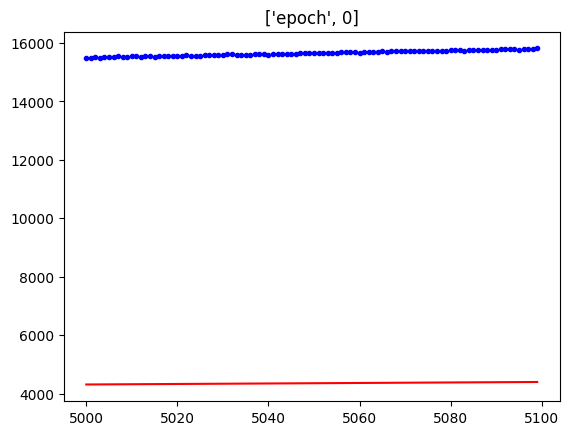

epoch is: 30, loss is 6125908.0,  W is: [[2.6337743]], b is [1.0003748]


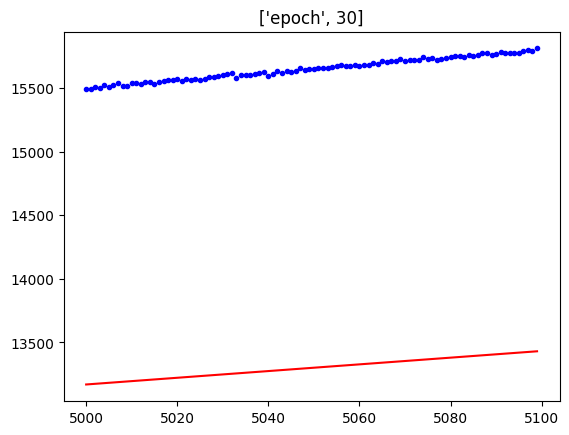

epoch is: 60, loss is 265071.53125,  W is: [[3.0021815]], b is [1.0004476]


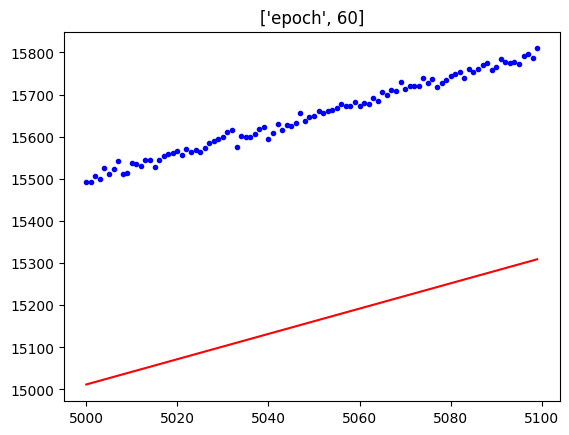

epoch is: 90, loss is 11545.740234375,  W is: [[3.0788045]], b is [1.0004628]


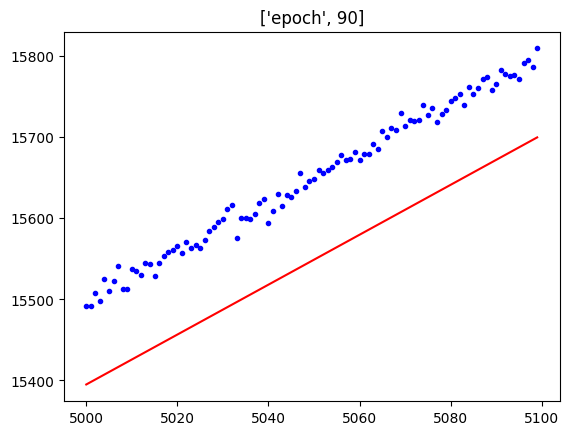

epoch is: 120, loss is 578.667724609375,  W is: [[3.094741]], b is [1.000466]


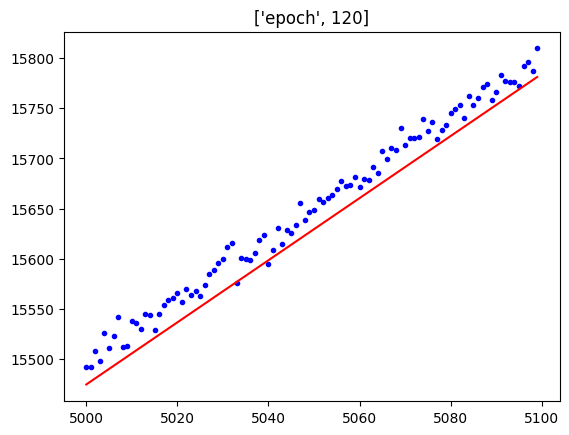

epoch is: 150, loss is 104.28350830078125,  W is: [[3.0980556]], b is [1.000466]


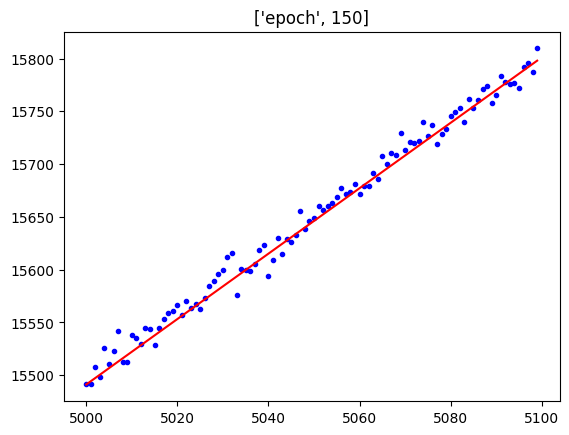

epoch is: 180, loss is 83.76566314697266,  W is: [[3.0987449]], b is [1.000466]


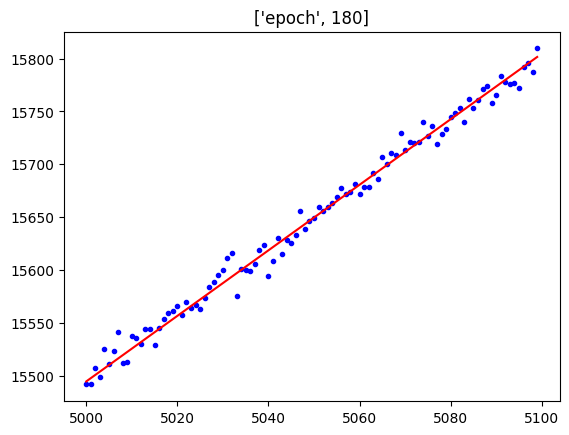

In [35]:
#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    if i%30 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b.')
        plt.plot(x_train, output(x_train), c='r')
        plt.show()

### Logistic Regression Model building in TensorFlow

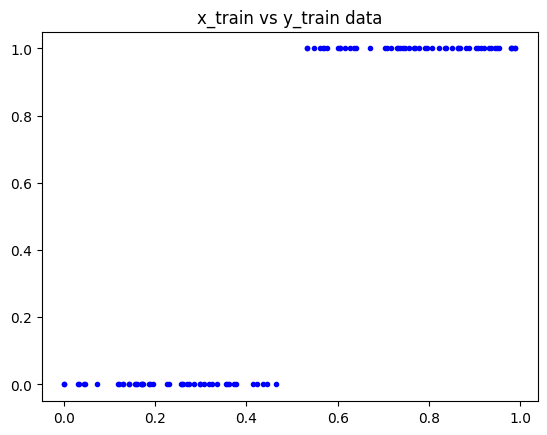

In [36]:
# This step is for data creation
x_train= np.random.rand(100,1)
y_train=np.array([0 if i < 0.5 else 1 for i in x_train]).reshape(-1,1)

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.',)
plt.show()

In [37]:
#Model y=sigmoid(X*W + b)
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  24.30487060546875,  W : [[0.8118221]], b  [0.0875754]
epoch : 1, loss  20.910444259643555,  W : [[1.0936912]], b  [-0.4500923]
epoch : 2, loss  18.212217330932617,  W : [[1.6208537]], b  [-0.47201174]
epoch : 3, loss  16.08098793029785,  W : [[1.8906196]], b  [-0.8527304]
epoch : 4, loss  14.365533828735352,  W : [[2.300552]], b  [-0.8887983]
epoch : 5, loss  12.98830795288086,  W : [[2.5391457]], b  [-1.1633472]
epoch : 6, loss  11.86674976348877,  W : [[2.8551195]], b  [-1.2244439]
epoch : 7, loss  10.948755264282227,  W : [[3.073939]], b  [-1.4113262]
epoch : 8, loss  10.187150955200195,  W : [[3.3202126]], b  [-1.4956046]
epoch : 9, loss  9.547469139099121,  W : [[3.5210798]], b  [-1.624236]
epoch : 10, loss  9.002777099609375,  W : [[3.7220676]], b  [-1.715368]
epoch : 11, loss  8.533163070678711,  W : [[3.9027524]], b  [-1.8135579]
epoch : 12, loss  8.123932838439941,  W : [[4.0752196]], b  [-1.8993449]
epoch : 13, loss  7.764013290405273,  W : [[4.236409]], b  [

Plotting

epoch is: 0, loss is 20.043529510498047,  W is: [[1.2258983]], b is [-0.531971]


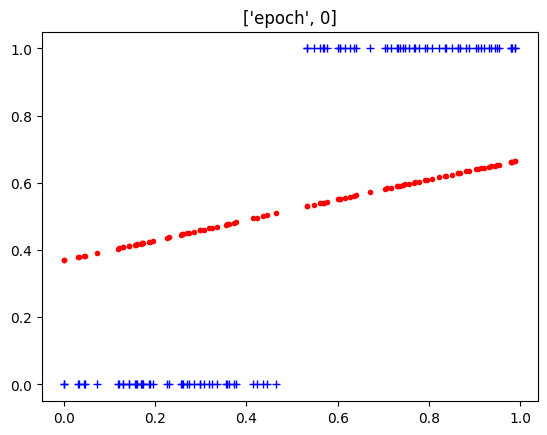

epoch is: 40, loss is 4.126182556152344,  W is: [[6.9332247]], b is [-3.32418]


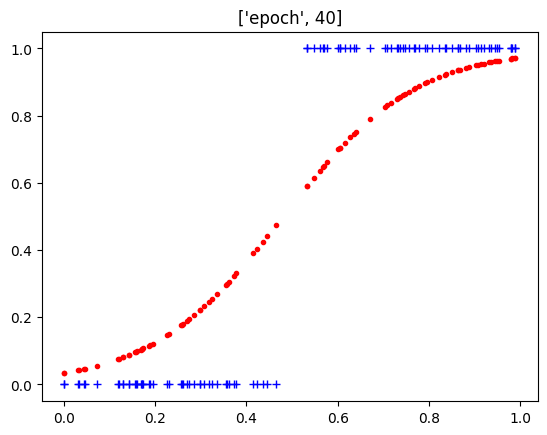

epoch is: 80, loss is 2.9337501525878906,  W is: [[8.852241]], b is [-4.262635]


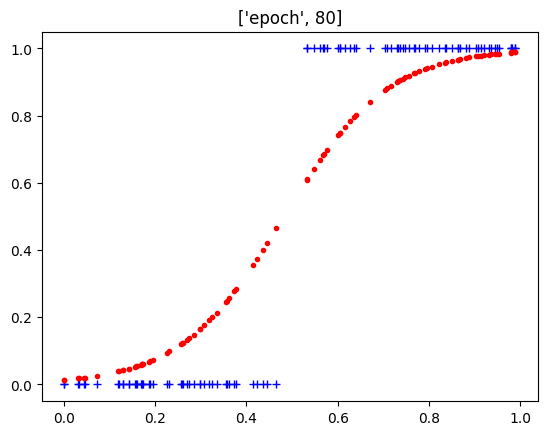

epoch is: 120, loss is 2.4120845794677734,  W is: [[10.138027]], b is [-4.890214]


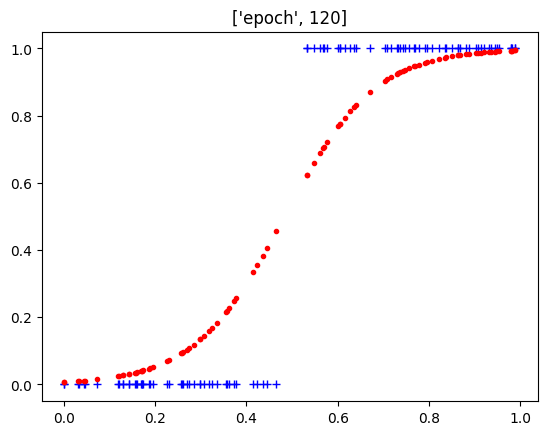

epoch is: 160, loss is 2.0995230674743652,  W is: [[11.136748]], b is [-5.3783355]


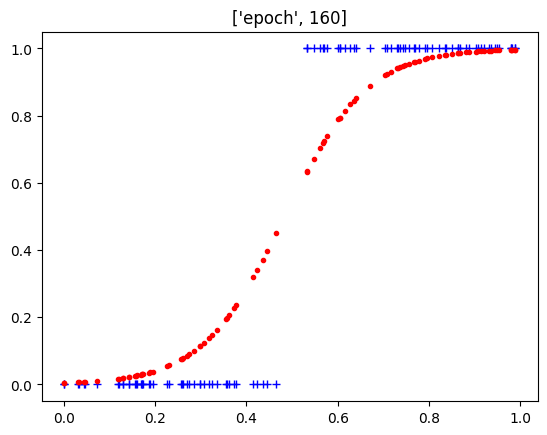

epoch is: 200, loss is 1.8842761516571045,  W is: [[11.96664]], b is [-5.784718]


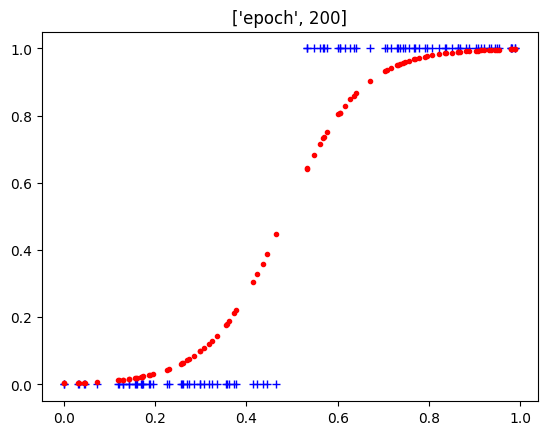

epoch is: 240, loss is 1.7238348722457886,  W is: [[12.683549]], b is [-6.136442]


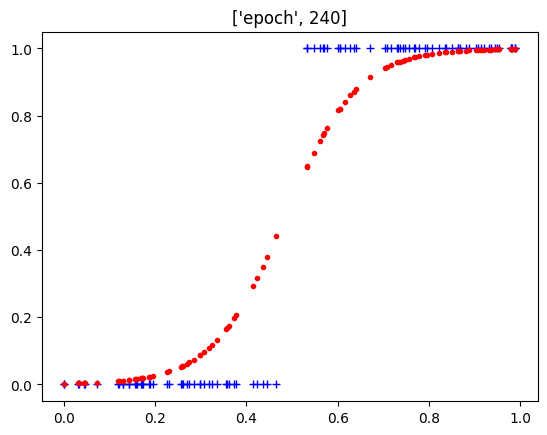

epoch is: 280, loss is 1.5979642868041992,  W is: [[13.318709]], b is [-6.448605]


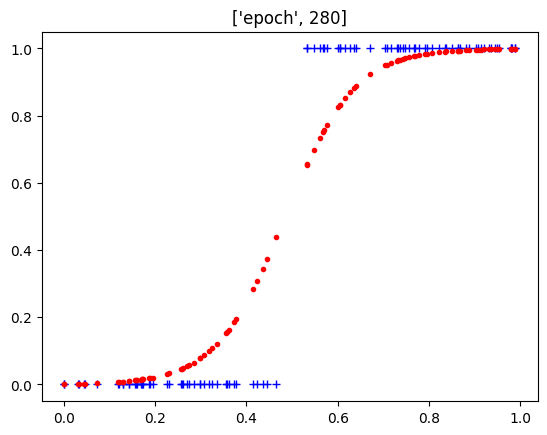

In [38]:
#Model y=X*W + b
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)

    if i%40 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b+')
        plt.plot(x_train, output(x_train), '.', c='r')
        plt.show()

# Keras

In [39]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [40]:
## The data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes=10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 23s 2us/step
(60000, 784) train input samples
(10000, 784) test input samples
(60000, 10) train output samples
(10000, 10) test output samples


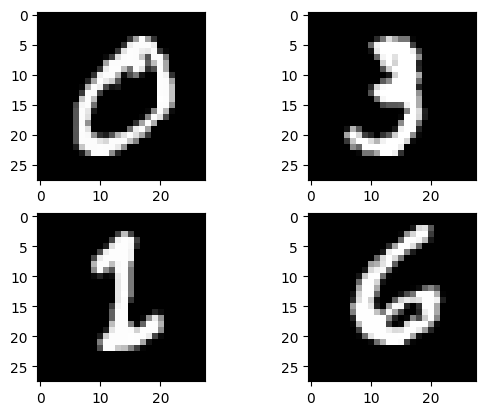

In [44]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[10], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[70], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[90], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [69]:
model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
#Input Layer. The model needs to know what input shape it should expect. 
#For this reason, the first layer in a Sequential model needs to receive information about its input shape.
#Only the first need the snape information, because following layers can do automatic shape inference
model.add(layers.Dense(300, activation='sigmoid')) #, input_shape=(784,)))

#The dense layer is simply a layer where each unit or neuron is connected to each neuron in the next layer.
model.add(layers.Dense(100, activation='sigmoid'))

#In the final layer mention the output classes
model.add(layers.Dense(10, activation='sigmoid'))

#Model Summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8009 - loss: 0.7199
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9419 - loss: 0.1933
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9604 - loss: 0.1310
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9718 - loss: 0.0953
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9774 - loss: 0.0731
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9809 - loss: 0.0615
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9851 - loss: 0.0480
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9876 - loss: 0.0395
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9897 - loss: 0.0336
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9908 - loss: 0.0299


In [71]:
print(model.get_weights())

[array([[ 0.01281863,  0.05253431, -0.06151598, ...,  0.06773199,
        -0.07053213,  0.02931989],
       [-0.00643272,  0.07092403, -0.01946068, ...,  0.02426877,
         0.02496964,  0.05129828],
       [ 0.0533053 , -0.02596394,  0.05744801, ..., -0.06182394,
        -0.05048495,  0.02276943],
       ...,
       [ 0.0605977 ,  0.07319923, -0.02299544, ..., -0.04951504,
        -0.01174331, -0.04123513],
       [-0.03429893, -0.06643626,  0.0438108 , ...,  0.0408802 ,
         0.0427215 ,  0.01853898],
       [-0.04843587, -0.01023535, -0.0383574 , ...,  0.01902259,
        -0.00516824, -0.03231796]], dtype=float32), array([-3.43640447e-01, -1.78314954e-01, -1.05497256e-01,  2.84628093e-01,
       -2.99921930e-01, -8.91619101e-02, -2.19667982e-02,  1.71660520e-02,
        1.60944968e-01, -1.36551531e-02,  4.24380675e-02, -6.87168241e-02,
        8.96982104e-02, -3.89687605e-02, -1.76740125e-01,  1.98272794e-01,
        2.50703454e-01, -2.66273301e-02, -7.37329153e-03,  6.85292184e

In [72]:
loss, acc = model.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - 3ms/step - accuracy: 0.9793 - loss: 0.0704
Test Accuracy: 97.93%
